<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Latihan_Scorecard_Germanv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

In [1]:
# Memperbarui Library
!pip install scikit-learn --upgrade

import sklearn as skl
print(skl. __version__) 

# Lalu restart ulang runtime nya

1.0.1


# Membaca Data

## 2.3.2.1 Persiapan data dan impor ke Python

Impor data yang akan digunakan untuk membuat model

In [2]:
# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Dataset/german_credit_easy.xlsx?raw=true')

## # 2.3.2.3 Struktur data

In [4]:
# Melihat sample dari dataset
df.tail(20) # Menampilkan 10 baris teratas dari dataframe df

,ID,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
980,ABC0981,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,radio/television,8386,... < 100 DM,4 <= ... < 7 years,2,male : single,none,2,if not A121 : building society savings agreeme...,49,none,own,1,skilled employee / official,1,none,yes
981,ABC0982,1,no checking account,48,existing credits paid back duly till now,business,4844,... < 100 DM,unemployed,3,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",33,bank,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
982,ABC0983,0,>= 200 DM / salary assignments for at least 1 ...,21,existing credits paid back duly till now,car (new),2923,100 <= ... < 500 DM,1 <= ... < 4 years,1,female : divorced/separated/married,none,1,"if not A121/A122 : car or other, not in attrib...",28,bank,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
983,ABC0984,1,< 0 DM,36,existing credits paid back duly till now,car (used),8229,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,if not A121 : building society savings agreeme...,26,none,own,1,skilled employee / official,2,none,yes
984,ABC0985,0,no checking account,24,critical account/ other credits existing (not ...,radio/television,2028,... < 100 DM,4 <= ... < 7 years,2,male : single,none,2,if not A121 : building society savings agreeme...,30,none,own,2,unskilled - resident,1,none,yes
985,ABC0986,0,< 0 DM,15,critical account/ other credits existing (not ...,radio/television,1433,... < 100 DM,1 <= ... < 4 years,4,female : divorced/separated/married,none,3,if not A121 : building society savings agreeme...,25,none,rent,2,skilled employee / official,1,none,yes
986,ABC0987,0,>= 200 DM / salary assignments for at least 1 ...,42,no credits taken/ all credits paid back duly,business,6289,... < 100 DM,... < 1 year,2,male : divorced/separated,none,1,if not A121 : building society savings agreeme...,33,none,own,2,skilled employee / official,1,none,yes
987,ABC0988,0,no checking account,13,existing credits paid back duly till now,domestic appliances,1409,100 <= ... < 500 DM,unemployed,2,female : divorced/separated/married,none,4,real estate,64,none,own,1,skilled employee / official,1,none,yes
988,ABC0989,0,< 0 DM,24,existing credits paid back duly till now,car (used),6579,... < 100 DM,unemployed,4,male : single,none,2,unknown / no property,29,none,for free,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
989,ABC0990,0,0 <= ... < 200 DM,24,critical account/ other credits existing (not ...,domestic appliances,1743,... < 100 DM,.. >= 7 years,4,male : single,none,2,if not A121 : building society savings agreeme...,48,none,own,2,unskilled - resident,1,none,yes


In [5]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   default                     1000 non-null   int64 
 2   account_check_status        1000 non-null   object
 3   duration_in_month           1000 non-null   int64 
 4   credit_history              1000 non-null   object
 5   purpose                     1000 non-null   object
 6   credit_amount               1000 non-null   int64 
 7   savings                     1000 non-null   object
 8   present_emp_since           1000 non-null   object
 9   installment_as_income_perc  1000 non-null   int64 
 10  personal_status_sex         1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_res_since           1000 non-null   int64 
 13  property                    1000 non-null   objec

## Mengubah Tipe Data

In [6]:
df['present_emp_since'] = df.present_emp_since.astype('object')
df['present_res_since'] = df.present_res_since.astype('object')
df['people_under_maintenance'] = df.people_under_maintenance.astype('object')
df['credits_this_bank'] = df.credits_this_bank.astype('object')
df['installment_as_income_perc'] = df.installment_as_income_perc.astype('object')

# Missing Data Treatment (Apa yang harus dilakukan terhadap data yang kosong?)

## # 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)


In [7]:
# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [8]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan
# terjadi baris data yang kosong lagi

df_clean = df_pembersihan_2

In [9]:
# Menghapus indeks dari data yang telah dibuang
# Langkah ini harus dilakukan karena penghapusan baris telah dilakukan, tapi indeks belum direset
# Pembaca dapat verifikasi perbedaan total indeks sebelum dan sesudah reset, dengan menggunakan info
# Jika reset tidak dilakukan, bisa terjadi kesalahan data di langkah-langkah berikutnya

df_clean = df_clean.reset_index(drop=True)

# Data Eksplorasi (Explanatory Data Analysis atau EDA)

## 2.3.2.5.5.1 EDA Analisa dasar variabel untuk default

In [10]:
# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['default'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['default'].value_counts(normalize=True) * 100)

0    700
1    300
Name: default, dtype: int64
0    70.0
1    30.0
Name: default, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk credit_history


In [11]:
# Untuk melihat frekuensi dari variabel credit_history
print(df_clean['credit_history'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel credit_history
print(df_clean['credit_history'].value_counts(normalize=True) * 100)

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64
existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [12]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK credit_history
print(pd.crosstab(df_clean['credit_history'], df_clean['default']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['credit_history'],df_clean['default'],normalize='index',)*100)

default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25
default                                                     0          1
credit_history                                                          
all credits at this bank paid back duly             42.857143  57.142857
critical account/ other credits existing (not a...  82.935154  17.064846
delay in paying off in the past                     68.181818  31.818182
existing credits paid back duly till now            68.113208  31.886792
no credits taken/ all credits paid back duly        37.500000  62.500000


## Latihan EDA untuk variabel kategori

In [13]:
# Latihan EDA untuk variabel lainnya
# Tulis kode disini
# Untuk melihat frekuensi dari variabel credit_history
print(df_clean['purpose'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel credit_history
print(df_clean['purpose'].value_counts(normalize=True) * 100)

# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK credit_history
print(pd.crosstab(df_clean['purpose'], df_clean['default']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['purpose'],df_clean['default'],normalize='index',)*100)

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
furniture/equipment              12
repairs                          12
retraining                        9
Name: purpose, dtype: int64
domestic appliances             28.0
car (new)                       23.4
radio/television                18.1
car (used)                      10.3
business                         9.7
(vacation - does not exist?)     5.0
education                        2.2
furniture/equipment              1.2
repairs                          1.2
retraining                       0.9
Name: purpose, dtype: float64
default                         0   1
purpose                              
(vacation - does not exist?)   28  22
business                       63  34
car (new)                     145  89
car (used)            

## 2.3.2.5.5.3 Exploratory Data Analysis untuk Age

In [14]:
# Rangkuman statistik untuk variabel numerik Age
print(df_clean['age'].describe())

# Rangkuman statistik untuk variabel numerik Age, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('default')['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0
1,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

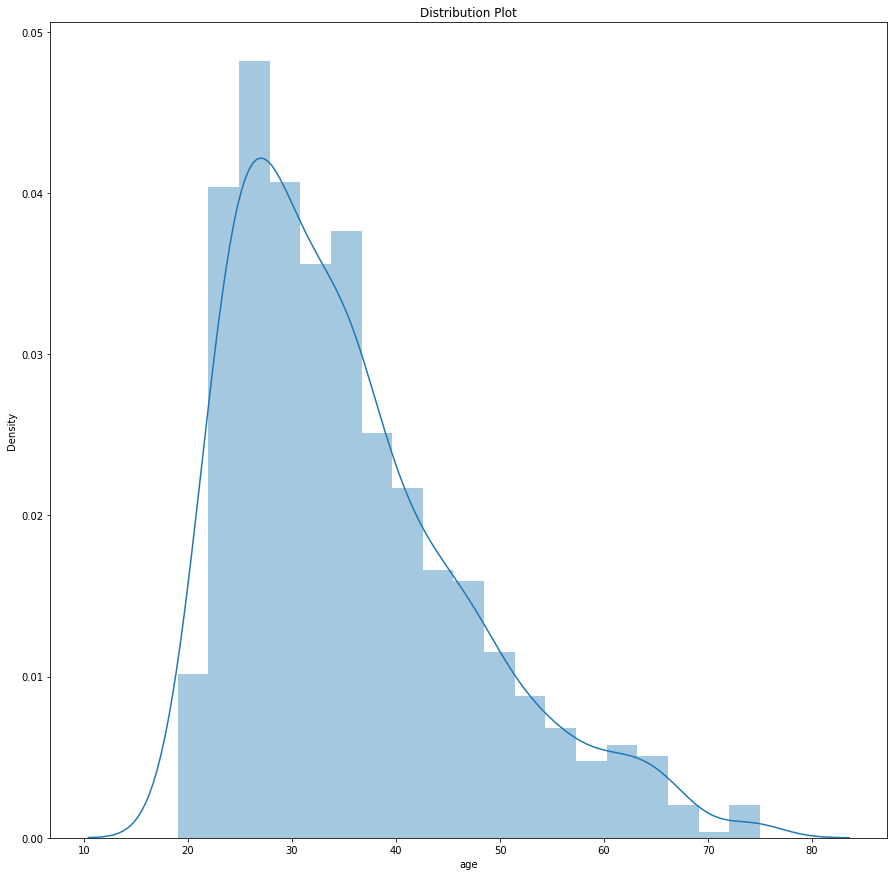

In [15]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['age'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


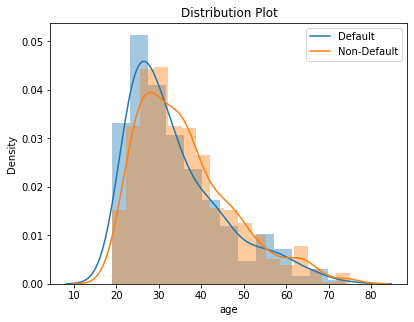

In [16]:
df_clean_0 = df_clean[df_clean.default == 0]
df_clean_1 = df_clean[df_clean.default == 1]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
sns.distplot(df_clean_1['age'], ax=ax).set_title('Distribution Plot') 
sns.distplot(df_clean_0['age'], ax=ax).set_title('Distribution Plot')
ax.legend(labels=["Default","Non-Default"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


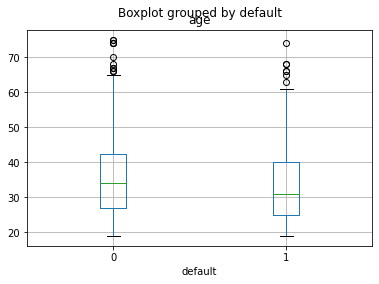

In [17]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='default',column=['age'])

## Latihan EDA untuk variabel Numerik

In [ ]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel numerik lainnya
# Tulis kode disini



## Korelasi

In [ ]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['age']))

-0.09112740931949889


In [ ]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# Usia dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].age,
             	df_clean[df_clean.default == 1].age, nan_policy='omit')

Ttest_indResult(statistic=2.890846677564194, pvalue=0.003925339398276282)

## 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

In [19]:
# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,default,duration_in_month,credit_amount,age
default,1.000000,0.214927,0.154739,-0.091127
duration_in_month,0.214927,1.000000,0.624984,-0.036136
credit_amount,0.154739,0.624984,1.000000,0.032716
age,-0.091127,-0.036136,0.032716,1.000000


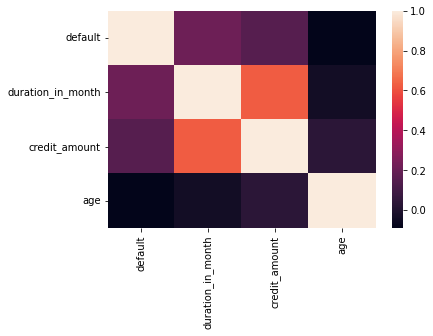

In [20]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Latihan Korelasi

In [ ]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [ ]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



## 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori


In [ ]:
# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
resultant.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                                    account_check_status_0 <= ... < 200 DM  ...  foreign_worker_yes
account_check_status_0 <= ... < 200 DM                                        0.000000e+00  ...        1.096327e-01
account_check_status_< 0 DM                                                   1.002773e-23  ...        1.196944e-01
account_check_status_>= 200 DM / salary assignm...                            1.472699e-06  ...        2.652936e-01
account_check_status_no checking account                                      2.160989e-33  ...        6.736398e-01
credit_history_all credits at this bank paid ba...                            5.578735e-01  ...        5.383645e-01
credit_history_critical account/ other credits ...                            1.702497e-03  ...        3.282270e-01
credit_history_delay in paying off in the past                                6.465593e-03  ...        6.594800e-02
credit_history_existing credits paid back duly ...                      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecard dengan Library scorecardpy

## Instalasi library

In [18]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 1.9 MB/s 


## Memilih variabel

In [30]:
import numpy as np
conditions = [
             ( df_clean['installment_as_income_perc'] == 1 ),
             ( df_clean['installment_as_income_perc'] == 2 ),
             ( df_clean['installment_as_income_perc'] == 3 ),
             ( df_clean['installment_as_income_perc'] == 4 )
             ]

choices = [
          'Bin 1',
          'Bin 2',
          'Bin 3',
          'Bin 4'
          ]

df_clean['installment_as_income_perc_Bin'] = np.select(conditions, choices)

In [31]:
df_clean.head(10)

,ID,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,installment_as_income_perc_Bin
0,ABC0001,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Bin 4
1,ABC0002,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bin 2
2,ABC0003,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Bin 2
3,ABC0004,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,Bin 2
4,ABC0005,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bin 3
5,ABC0006,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,Bin 2
6,ABC0007,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,none,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes,Bin 3
7,ABC0008,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,Bin 2
8,ABC0009,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled - resident,1,none,yes,Bin 2
9,ABC0010,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,none,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes,Bin 4


In [40]:
#  ada variabel yang aneh: installment_as_income_perc, ,'present_res_since','credits_this_bank,people_under_maintenance
#df_all = df_clean.drop(columns=['ID'])
df_all = df_clean [['default','account_check_status','duration_in_month','credit_history','purpose'
                  ,'credit_amount','savings','present_emp_since','personal_status_sex','other_debtors'
                  ,'property','age','other_installment_plans','housing','job','telephone','foreign_worker'
                  ,'installment_as_income_perc_Bin'
                  ]]

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   default                         1000 non-null   int64 
 1   account_check_status            1000 non-null   object
 2   duration_in_month               1000 non-null   int64 
 3   credit_history                  1000 non-null   object
 4   purpose                         1000 non-null   object
 5   credit_amount                   1000 non-null   int64 
 6   savings                         1000 non-null   object
 7   present_emp_since               1000 non-null   object
 8   personal_status_sex             1000 non-null   object
 9   other_debtors                   1000 non-null   object
 10  property                        1000 non-null   object
 11  age                             1000 non-null   int64 
 12  other_installment_plans         1000 non-null   o

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'account_check_status': <Figure size 432x288 with 2 Axes>,
 'age': <Figure size 432x288 with 2 Axes>,
 'credit_amount': <Figure size 432x288 with 2 Axes>,
 'credit_history': <Figure size 432x288 with 2 Axes>,
 'duration_in_month': <Figure size 432x288 with 2 Axes>,
 'foreign_worker': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'installment_as_income_perc_Bin': <Figure size 432x288 with 2 Axes>,
 'job': <Figure size 432x288 with 2 Axes>,
 'other_debtors': <Figure size 432x288 with 2 Axes>,
 'other_installment_plans': <Figure size 432x288 with 2 Axes>,
 'personal_status_sex': <Figure size 432x288 with 2 Axes>,
 'present_emp_since': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'savings': <Figure size 432x288 with 2 Axes>,
 'telephone': <Figure size 432x288 with 2 Axes>}

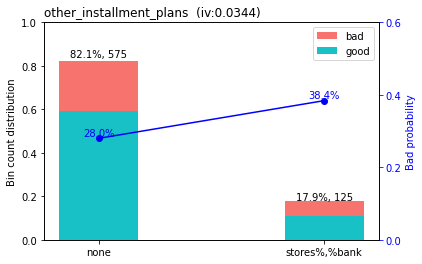

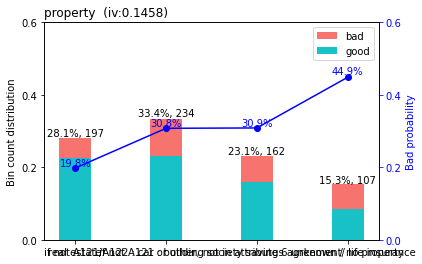

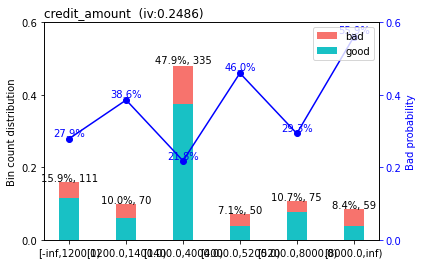

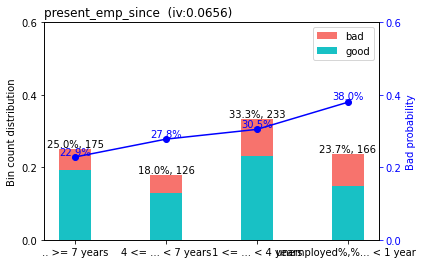

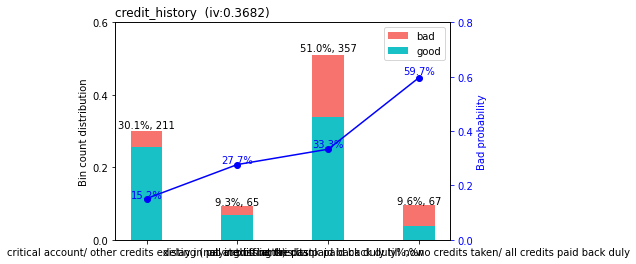

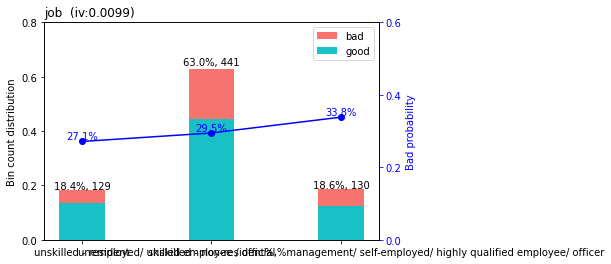

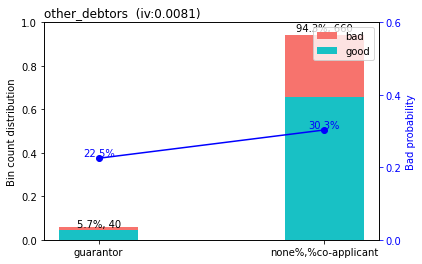

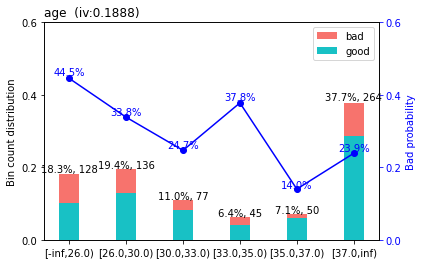

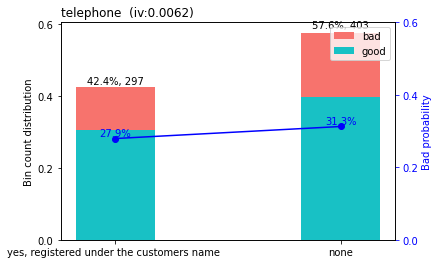

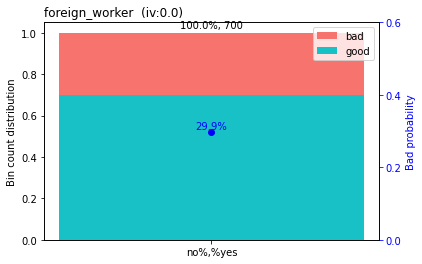

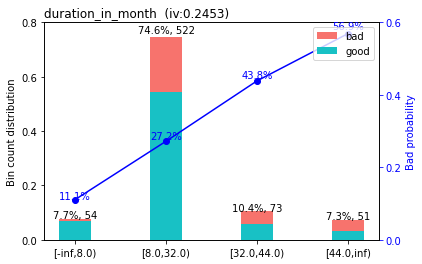

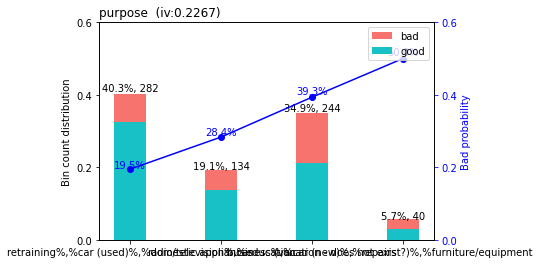

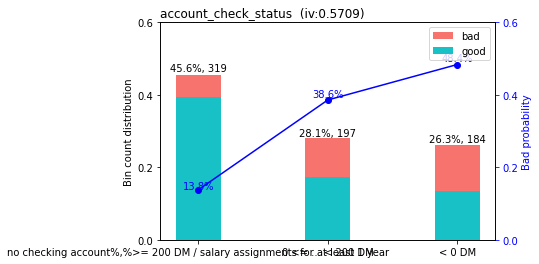

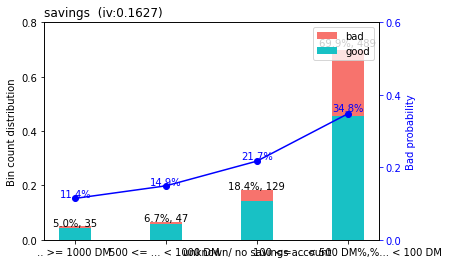

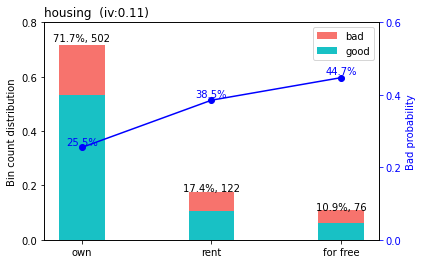

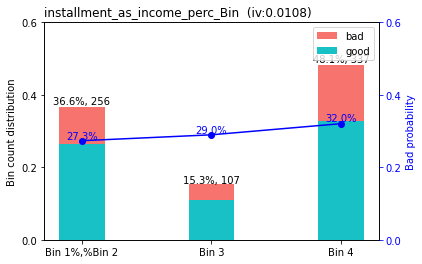

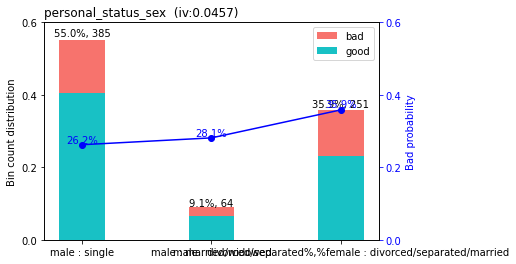

In [41]:
y = df_all.loc[:,'default']
X = df_all.loc[:,df_all.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
}
bins_adj = scpy.woebin(df_train, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

## Pembuatan WOE secara otomatis

In [42]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
     other_installment_plans_woe  ...  duration_in_month_woe
0                      -0.090352  ...              -0.130234
1                      -0.090352  ...              -0.130234
2                      -0.090352  ...              -0.130234
3                      -0.090352  ...              -0.130234
4                      -0.090352  ...               0.606274
..                           ...  ...                    ...
695                     0.381505  ...              -0.130234
696                    -0.090352  ...              -0.130234
697                    -0.090352  ...              -0.130234
698                    -0.090352  ...              -0.130234
699                    -0.090352  ...              -1.225332

[700 rows x 17 columns]
0      0
1      0
2      0
3      0
4      0
      ..
695    1
696    0
697    0
698    1
699    0
Name: default, Length: 700, dtype: int64


## Model dengan logistic regression dan hasil Scorecard

In [43]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['other_installment_plans_woe' 'installment_as_income_perc_Bin_woe'
 'personal_status_sex_woe' 'property_woe' 'purpose_woe'
 'credit_amount_woe' 'savings_woe' 'present_emp_since_woe'
 'credit_history_woe' 'housing_woe' 'job_woe' 'foreign_worker_woe'
 'other_debtors_woe' 'age_woe' 'telephone_woe' 'account_check_status_woe'
 'duration_in_month_woe'] [[ 0.65911647  1.69603052  0.65759508  0.53323018  0.83989962  0.89307409
   0.66546779  0.26540545  0.63472895  0.38372423 -0.17321104  0.
   0.66361362  0.92103831  0.54619118  0.74636109  0.57451124]]
Intercept:  [-0.84716996]


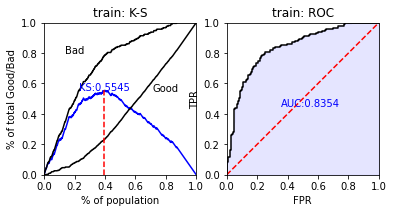

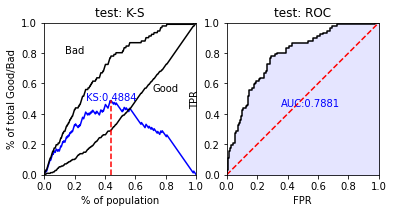

{'basepoints':      variable  bin  points
0  basepoints  NaN     561, 'other_installment_plans':                   variable            bin  points
0  other_installment_plans           none     4.0
1  other_installment_plans  stores%,%bank   -18.0, 'installment_as_income_perc_Bin':                           variable            bin  points
52  installment_as_income_perc_Bin  Bin 1%,%Bin 2    15.0
53  installment_as_income_perc_Bin          Bin 3     5.0
54  installment_as_income_perc_Bin          Bin 4   -13.0, 'personal_status_sex':                variable  ... points
55  personal_status_sex  ...    9.0
56  personal_status_sex  ...    4.0
57  personal_status_sex  ...  -13.0

[3 rows x 3 columns], 'property':    variable                                                bin  points
2  property                                        real estate    21.0
3  property  if not A121/A122 : car or other, not in attrib...    -2.0
4  property  if not A121 : building society savings agreeme...    -2.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


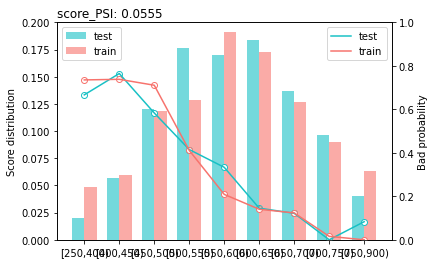

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.055499}

In [45]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
print(card)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [46]:
df_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
train_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_scorecard.to_csv('train_scorecard.csv') 
files.download('train_scorecard.csv')

test_score.to_csv('test_score.csv') 
files.download('test_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecardpy hanya dengan tiga variabel dengan IV tertinggi

## Memilih variabel

In [60]:
#  ada variabel yang aneh: installment_as_income_perc, ,'present_res_since','credits_this_bank,people_under_maintenance
df_3_var = df_clean[['default','account_check_status','duration_in_month','credit_history']]

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'account_check_status': <Figure size 432x288 with 2 Axes>,
 'credit_history': <Figure size 432x288 with 2 Axes>,
 'duration_in_month': <Figure size 432x288 with 2 Axes>}

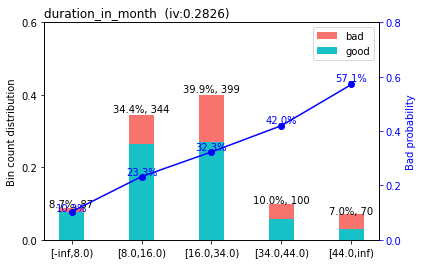

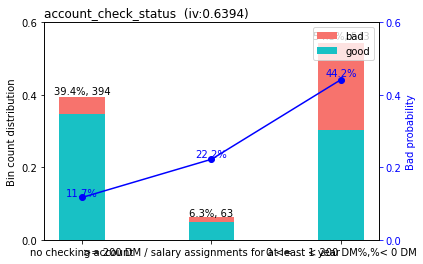

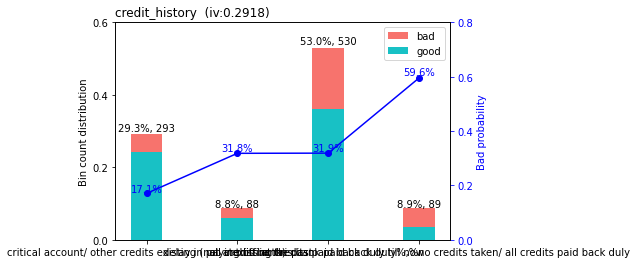

In [61]:
y = df_3_var.loc[:,'default']
X = df_3_var.loc[:,df_3_var.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_3_var, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
}
bins_adj = scpy.woebin(df_3_var, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

In [49]:
print(bin)

<built-in function bin>


## Pembuatan WOE secara otomatis

In [62]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
     credit_history_woe  account_check_status_woe  duration_in_month_woe
0              0.085158                 -1.176263               0.108688
1              0.088319                 -1.176263              -0.346625
2              0.088319                  0.614204               0.108688
3             -0.733741                  0.614204              -0.346625
4             -0.733741                 -1.176263               0.524524
..                  ...                       ...                    ...
695            1.234071                 -1.176263               0.108688
696            0.088319                 -1.176263               0.108688
697           -0.733741                 -1.176263               0.108688
698            0.088319                  0.614204              -0.346625
699            0.085158                 -1.176263              -1.312186

[700 rows x 3 columns]
0      0
1      0
2     

## Model dengan logistic regression dan hasil Scorecard

In [63]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['credit_history_woe' 'account_check_status_woe' 'duration_in_month_woe'] [[0.77595338 0.81326348 0.80356522]]
Intercept:  [-0.85574828]


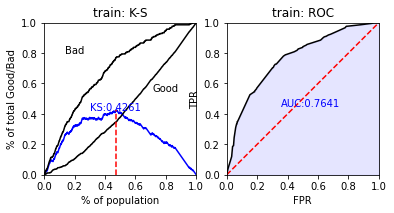

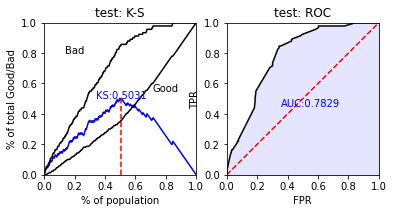

{'basepoints':      variable  bin  points
0  basepoints  NaN     562, 'credit_history':           variable                                                bin  points
8   credit_history  critical account/ other credits existing (not ...    41.0
9   credit_history                    delay in paying off in the past    -5.0
10  credit_history           existing credits paid back duly till now    -5.0
11  credit_history  all credits at this bank paid back duly%,%no c...   -69.0, 'account_check_status':                variable  ... points
5  account_check_status  ...   69.0
6  account_check_status  ...   24.0
7  account_check_status  ...  -36.0

[3 rows x 3 columns], 'duration_in_month':             variable          bin  points
0  duration_in_month   [-inf,8.0)    76.0
1  duration_in_month   [8.0,16.0)    20.0
2  duration_in_month  [16.0,34.0)    -6.0
3  duration_in_month  [34.0,44.0)   -30.0
4  duration_in_month   [44.0,inf)   -66.0}


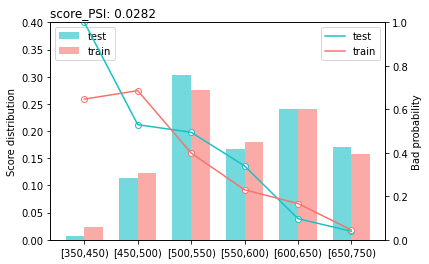

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable      PSI
 0    score  0.02822}

In [64]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
print(card)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
df_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
train_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_scorecard.to_csv('train_scorecard.csv') 
files.download('train_scorecard.csv')

test_score.to_csv('test_score.csv') 
files.download('test_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard


In [65]:
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan
df_woe_iv = (pd.crosstab(df_clean['account_check_status'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

df_woe_iv = (pd.crosstab(df_clean['duration_in_month'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

df_woe_iv = (pd.crosstab(df_clean['credit_history'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                                                    0  ...        iv
account_check_status                                          ...          
0 <= ... < 200 DM                                   0.234286  ...  0.666012
< 0 DM                                              0.198571  ...  0.666012
>= 200 DM / salary assignments for at least 1 year  0.070000  ...  0.666012
no checking account                                 0.497143  ...  0.666012

[4 rows x 4 columns]
default                   0         1       woe   iv
duration_in_month                                   
4                  0.008571  0.000000      -inf  inf
5                  0.001429  0.000000      -inf  inf
6                  0.094286  0.030000 -1.145132  inf
7                  0.007143  0.000000      -inf  inf
8                  0.008571  0.003333 -0.944462  inf
9                  0.050000  0.046667 -0.068993  inf
10                 0.035714  0.010000 -1.272966  inf
11                 0.012857  0.000000      -i

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
pd.crosstab(df_clean['account_check_status'],df_clean['default'])

default,0,1
account_check_status,,
0 <= ... < 200 DM,164,105
< 0 DM,139,135
>= 200 DM / salary assignments for at least 1 year,49,14
no checking account,348,46


In [ ]:
pd.crosstab(df_clean['duration_in_month'],df_clean['default'])

default,0,1
duration_in_month,,
4,6,0
5,1,0
6,66,9
7,5,0
8,6,1
9,35,14
10,25,3
11,9,0
12,130,49


In [67]:
pd.crosstab(df_clean['account_check_status'],df_clean['default'])

default,0,1
account_check_status,,
0 <= ... < 200 DM,164,105
< 0 DM,139,135
>= 200 DM / salary assignments for at least 1 year,49,14
no checking account,348,46


In [97]:
# Variabel account_check_status

conditions = [
             ( df_clean['account_check_status'] == '0 <= ... < 200 DM' ),
             ( df_clean['account_check_status'] == '< 0 DM' ),
             ( df_clean['account_check_status'] == '>= 200 DM / salary assignments for at least 1 year' ),
             ( df_clean['account_check_status'] == 'no checking account' )
             ]

choices = [
          '1. 0-200 DM',
          '2. < 0 & >= 200 DM',
          '2. < 0 & >= 200 DM',
          '3. No Checking'
          ]
df_clean['account_check_status_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(pd.crosstab(df_clean['account_check_status_Bin'],df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['account_check_status_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['account_check_status'] == '0 <= ... < 200 DM' ),
             ( df_clean['account_check_status'] == '< 0 DM' ),
             ( df_clean['account_check_status'] == '>= 200 DM / salary assignments for at least 1 year' ),
             ( df_clean['account_check_status'] == 'no checking account' )
             ]

choices = [
          0.401392,
          0.614802,
          0.614802,
          -1.176263
          ]
df_clean['account_check_status_WOE'] = np.select(conditions, choices)

default                     0    1
account_check_status_Bin          
1. 0-200 DM               164  105
2. < 0 & >= 200 DM        188  149
3. No Checking            348   46
default                          0         1       woe        iv
account_check_status_Bin                                        
1. 0-200 DM               0.234286  0.350000  0.401392  0.591091
2. < 0 & >= 200 DM        0.268571  0.496667  0.614802  0.591091
3. No Checking            0.497143  0.153333 -1.176263  0.591091


In [98]:
df_clean.head(20)

,ID,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,installment_as_income_perc_Bin,account_check_status_Bin,account_check_status_WOE,duration_in_month_Bin,credit_history_Bin,credit_history_WOE,duration_in_month_WOE
0,ABC0001,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Bin 4,2. < 0 & >= 200 DM,0.614802,1.0-8,2.critical account,-0.733741,-1.280934
1,ABC0002,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bin 2,1. 0-200 DM,0.401392,5.>44,4.existing,0.088319,1.134980
2,ABC0003,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Bin 2,3. No Checking,-1.176263,2.9-16,2.critical account,-0.733741,-0.327504
3,ABC0004,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,Bin 2,2. < 0 & >= 200 DM,0.614802,4.35-44,4.existing,0.088319,0.524524
4,ABC0005,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bin 3,2. < 0 & >= 200 DM,0.614802,3.17-34,3.delay,0.085158,0.104617
5,ABC0006,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,Bin 2,3. No Checking,-1.176263,4.35-44,4.existing,0.088319,0.524524
6,ABC0007,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,none,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes,Bin 3,3. No Checking,-1.176263,3.17-34,4.existing,0.088319,0.104617
7,ABC0008,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,Bin 2,1. 0-200 DM,0.401392,4.35-44,4.existing,0.088319,0.524524
8,ABC0009,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled - resident,1,none,yes,Bin 2,3. No Checking,-1.176263,2.9-16,4.existing,0.088319,-0.327504
9,ABC0010,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,none,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes,Bin 4,1. 0-200 DM,0.401392,3.17-34,2.critical account,-0.733741,0.104617


In [99]:
# Variabel duration_in_month dengan WOE dan IV 

conditions = [
             ( df_clean['duration_in_month'] <= 8 ),
             ( df_clean['duration_in_month'] >= 9 ) & ( df_clean['duration_in_month'] <= 16),
             ( df_clean['duration_in_month'] >= 17 ) & ( df_clean['duration_in_month'] <= 34),
             ( df_clean['duration_in_month'] >= 35 ) & ( df_clean['duration_in_month'] <= 44),
             ( df_clean['duration_in_month'] >= 45 )
             ]

choices = [
          '1.0-8',
          '2.9-16',
          '3.17-34',
          '4.35-44',
          '5.>44'
          ]
df_clean['duration_in_month_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(pd.crosstab(df_clean['duration_in_month_Bin'],df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['duration_in_month_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['duration_in_month'] <= 8 ),
             ( df_clean['duration_in_month'] >= 9 ) & ( df_clean['duration_in_month'] <= 16),
             ( df_clean['duration_in_month'] >= 17 ) & ( df_clean['duration_in_month'] <= 34),
             ( df_clean['duration_in_month'] >= 35 ) & ( df_clean['duration_in_month'] <= 44),
             ( df_clean['duration_in_month'] >= 45 )
             ]

choices = [
          -1.280934,
          -0.327504,
          0.104617,
          0.524524,
          1.134980
          ]
df_clean['duration_in_month_WOE'] = np.select(conditions, choices)

default                  0    1
duration_in_month_Bin          
1.0-8                   84   10
2.9-16                 259   80
3.17-34                269  128
4.35-44                 58   42
5.>44                   30   40
default                       0         1       woe        iv
duration_in_month_Bin                                        
1.0-8                  0.120000  0.033333 -1.280934  0.281952
2.9-16                 0.370000  0.266667 -0.327504  0.281952
3.17-34                0.384286  0.426667  0.104617  0.281952
4.35-44                0.082857  0.140000  0.524524  0.281952
5.>44                  0.042857  0.133333  1.134980  0.281952


In [100]:
# Variabel credit_history

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(pd.crosstab(df_clean['credit_history'],df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['credit_history'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['credit_history'] == 'all credits at this bank paid back duly' ),
             ( df_clean['credit_history'] == 'no credits taken/ all credits paid back duly' ),
             ( df_clean['credit_history'] == 'critical account/ other credits existing (not at this bank)' ),
             ( df_clean['credit_history'] == 'delay in paying off in the past' ),
             ( df_clean['credit_history'] == 'existing credits paid back duly till now' )
             ]

choices = [
          '1.all credits / no',
          '1.all credits / no',
          '2.critical account',
          '3.delay',
          '4.existing'
          ]
df_clean['credit_history_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['credit_history_Bin'],df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['credit_history_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['credit_history'] == 'all credits at this bank paid back duly' ),
             ( df_clean['credit_history'] == 'no credits taken/ all credits paid back duly' ),
             ( df_clean['credit_history'] == 'critical account/ other credits existing (not at this bank)' ),
             ( df_clean['credit_history'] == 'delay in paying off in the past' ),
             ( df_clean['credit_history'] == 'existing credits paid back duly till now' )
             ]

choices = [
          1.234071,
          1.234071,
          -0.733741,
          0.085158,
          0.088319
          ]
df_clean['credit_history_WOE'] = np.select(conditions, choices)

default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25
default                                                    0  ...        iv
credit_history                                                ...          
all credits at this bank paid back duly             0.030000  ...  0.293234
critical account/ other credits existing (not a...  0.347143  ...  0.293234
delay in paying off in the past                     0.085714  ...  0.293234
existing credits paid back duly till now            0.515714  ...  0.293234
no credits taken/ all credits paid back duly        0.021429  ...  0.293234

[5 rows x 4 columns]
default            

# Proses Modeling

## Persiapan membuat model: Memilih Variabel Input

In [119]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model
# Contoh hanya menggunakan 3 variabel input saja: 

df_model_WOE = df_clean[['default','account_check_status_WOE','duration_in_month_WOE','credit_history_WOE']]
df_model_Bin = df_clean[['default','account_check_status_Bin','duration_in_month_Bin','credit_history_Bin']]
df_model = df_clean[['default','account_check_status','duration_in_month','credit_history']]

In [120]:
# Dalam contoh ini tidak ada oversampling/undersampling
print(df_model_WOE['account_check_status_WOE'])

0      0.614802
1      0.401392
2     -1.176263
3      0.614802
4      0.614802
         ...   
995   -1.176263
996    0.614802
997   -1.176263
998    0.614802
999    0.401392
Name: account_check_status_WOE, Length: 1000, dtype: float64


## Membagi dataset menjadi train dan test

In [121]:
y = df_clean.loc[:,'default']
X = df_clean.loc[:,df_clean.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.head(1)

,ID,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,installment_as_income_perc_Bin,account_check_status_Bin,account_check_status_WOE,duration_in_month_Bin,credit_history_Bin,credit_history_WOE,duration_in_month_WOE
541,ABC0542,no checking account,24,delay in paying off in the past,car (new),2032,... < 100 DM,.. >= 7 years,4,male : single,none,4,unknown / no property,60,none,for free,2,skilled employee / official,1,"yes, registered under the customers name",yes,Bin 4,3. No Checking,-1.176263,3.17-34,3.delay,0.085158,0.104617


In [122]:
# Membagi dataset menjadi development(train) dan test

y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [115]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train.to_csv('df_train_manual_logistic.csv') 
files.download('df_train_manual_logistic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modeling dengan logistic regression

In [123]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)
print(lr.classes_)

Coefficient:  ['account_check_status_WOE' 'duration_in_month_WOE' 'credit_history_WOE'] [[0.82811102 0.84537091 0.79106103]]
Intercept:  [-0.85511902]
[0 1]


In [124]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
print(test_predict)
# Cara adalah 0 jika bayar, dan 1 jika default

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0]


In [126]:
train_pred_proba = lr.predict_proba(X_train)
test_pred_proba = lr.predict_proba(X_test)

print(train_pred_proba)
# Cara bacanya adalah 0.635 adalah probabilitas 0 dan 0.364 adaalah probabilitas 1
# Dengan mengacu probabilitas 1 diatas 0.5 maka default / 1

[[0.84202728 0.15797272]
 [0.88454495 0.11545505]
 [0.54678495 0.45321505]
 ...
 [0.91061677 0.08938323]
 [0.6747435  0.3252565 ]
 [0.94504379 0.05495621]]


In [127]:
# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, test_predict))
conf_mat = confusion_matrix(y_true=y_test, y_pred=test_predict)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, test_pred_proba[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       209
           1       0.62      0.22      0.33        91

    accuracy                           0.72       300
   macro avg       0.68      0.58      0.58       300
weighted avg       0.70      0.72      0.67       300

Confusion matrix:
 [[197  12]
 [ 71  20]]
ROC Score: 0.7810347547189653


## Modeling logistic regression dengan Stepwise

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LogisticRegression()
lr.fit(X_train, y_train)

feature_names = np.array(X.columns)

sfs_backward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="backward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise backward: ', feature_names[sfs_backward.get_support()]
)

sfs_forward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="forward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise forward: ', feature_names[sfs_forward.get_support()]
)

Variabel signifikan stepwise backward:  ['SLIK_Kolektibilitas_WOE']
Variabel signifikan stepwise forward:  ['SLIK_Kolektibilitas_WOE']


In [ ]:
# Testing hasil stepwise

df_step = df_clean[['SLIK_Kolektibilitas_WOE','DBR_WOE','Usia_WOE','Mobile_Provider_WOE','Device_Apps_Installed_WOE'
                  ,'Mobile_Number_Active_Since_WOE','default'
                  ]]

# Membagi dataset menjadi development(train) dan test

y_step = df_step.loc[:,'default']
X_step = df_step.loc[:,df_step.columns != 'default']

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.30, random_state=42)

lr_step = LogisticRegression()
lr_step.fit(X_train_step, y_train_step)

test_predict_step = lr_step.predict(X_test_step)
test_pred_proba_step = lr_step.predict_proba(X_test_step)

# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test_step, test_predict_step))
conf_mat = confusion_matrix(y_true=y_test_step, y_pred=test_predict_step)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test_step, test_pred_proba_step[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       204
           1       0.71      0.46      0.56        81

    accuracy                           0.79       285
   macro avg       0.76      0.69      0.71       285
weighted avg       0.78      0.79      0.78       285

Confusion matrix:
 [[189  15]
 [ 44  37]]
ROC Score: 0.7784132171387074


## Membuat Scoring dari probabilitas

In [129]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1/4 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

In [130]:
# Perhitungan manual untuk data train
train_pred_proba = lr.predict_proba(X_train)[:,1]
score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_scoring_manual = pd.concat([df_train, df_train_pred_proba, df_train_score], axis = 1)

# Perhitungan manual untuk data test
test_pred_proba = lr.predict_proba(X_test)[:,1]
score = A - B*np.log(test_pred_proba/(1-test_pred_proba))
df_test_pred_proba = pd.DataFrame(test_pred_proba, columns=['test_pred_proba'])
df_test_score = pd.DataFrame(score, columns=['Score'])
df_test_scoring_manual = pd.concat([df_test, df_test_pred_proba, df_test_score], axis = 1)

In [131]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train_scoring_manual.to_csv('df_train_scoring_manual.csv') 
files.download('df_train_scoring_manual.csv')

df_test_scoring_manual.to_csv('df_test_scoring_manual.csv') 
files.download('df_test_scoring_manual.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
#  ada variabel yang aneh: installment_as_income_perc, ,'present_res_since','credits_this_bank,people_under_maintenance
df_3_var_bin = df_clean[['default','account_check_status_Bin','duration_in_month_Bin','credit_history_Bin']]

## Persiapan Modeling, train dan test dataset, pembuatan binning dan EDA

[INFO] creating woe binning ...
[INFO] creating woe binning ...


{'account_check_status_Bin': <Figure size 432x288 with 2 Axes>,
 'credit_history_Bin': <Figure size 432x288 with 2 Axes>,
 'duration_in_month_Bin': <Figure size 432x288 with 2 Axes>}

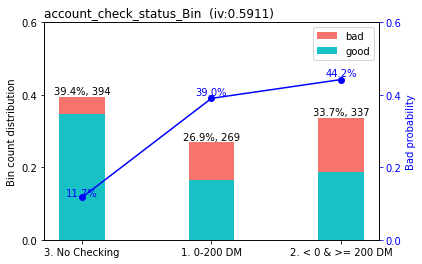

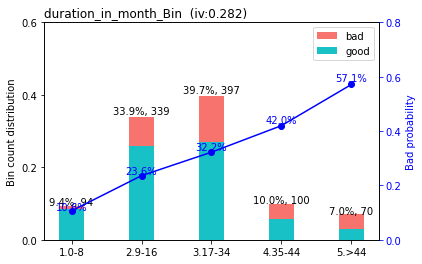

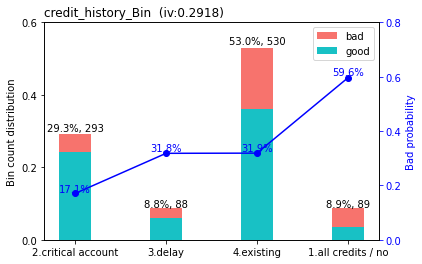

In [133]:
y = df_3_var_bin.loc[:,'default']
X = df_3_var_bin.loc[:,df_3_var_bin.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_3_var_bin, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
}
bins_adj = scpy.woebin(df_3_var_bin, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

## Pembuatan WOE secara otomatis

In [134]:
# contoh pembuatan tanpa test
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
     duration_in_month_Bin_woe  ...  credit_history_Bin_woe
0                     0.104617  ...                0.085158
1                    -0.327504  ...                0.088319
2                     0.104617  ...                0.088319
3                    -0.327504  ...               -0.733741
4                     0.524524  ...               -0.733741
..                         ...  ...                     ...
695                   0.104617  ...                1.234071
696                   0.104617  ...                0.088319
697                   0.104617  ...               -0.733741
698                  -0.327504  ...                0.088319
699                  -1.280934  ...                0.085158

[700 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
695    1
696    0
697    0
698    1
699    0
Name: default, Length: 700, dtype: int64


## Model dengan logistic regression dan hasil Scorecard

In [135]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  ['duration_in_month_Bin_woe' 'account_check_status_Bin_woe'
 'credit_history_Bin_woe'] [[0.84537118 0.82811091 0.79106124]]
Intercept:  [-0.85511894]


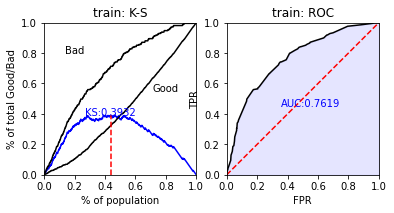

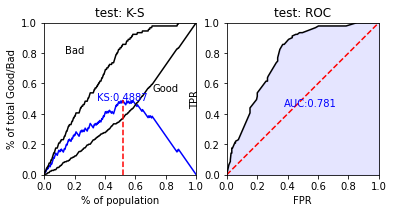

{'basepoints':      variable  bin  points
0  basepoints  NaN     562, 'duration_in_month_Bin':                 variable      bin  points
3  duration_in_month_Bin    1.0-8    78.0
4  duration_in_month_Bin   2.9-16    20.0
5  duration_in_month_Bin  3.17-34    -6.0
6  duration_in_month_Bin  4.35-44   -32.0
7  duration_in_month_Bin    5.>44   -69.0, 'account_check_status_Bin':                    variable                 bin  points
0  account_check_status_Bin      3. No Checking    70.0
1  account_check_status_Bin         1. 0-200 DM   -24.0
2  account_check_status_Bin  2. < 0 & >= 200 DM   -37.0, 'credit_history_Bin':               variable                 bin  points
8   credit_history_Bin  2.critical account    42.0
9   credit_history_Bin             3.delay    -5.0
10  credit_history_Bin          4.existing    -5.0
11  credit_history_Bin  1.all credits / no   -70.0}


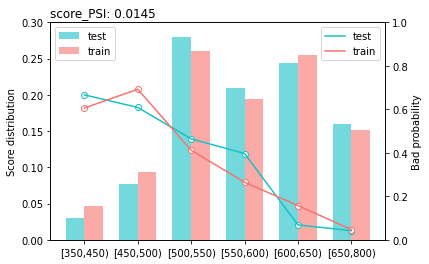

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.014509}

In [136]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/4, pdo=50, basepoints_eq0=False)
print(card)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
df_train_prob = pd.DataFrame(train_pred, columns=['Probability'])
train_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

df_test_prob = pd.DataFrame(test_pred, columns=['Probability'])
test_scorecard = pd.concat([train_score, df_train_prob], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_scorecard.to_csv('train_scorecard.csv') 
files.download('train_scorecard.csv')

test_scorecard.to_csv('test_scorecard.csv') 
files.download('test_scorecard.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>